In [1]:
import json
import torch
import torchvision
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
from Tests.helper_functions import tokenize
import sys
import os
import torch.nn as nn

sys.path.append('../Python/Tests')

from CNN_small_architecture import CNNSmall

# Setting up the pytorch model

In [2]:
# Setting up the original network
model_original = CNNSmall()
model_original.eval()
# Setting the path to load the model
path = "CNN_small"
load = True
# Loading the model orginal model
if load and os.path.isfile(path):
    model_original.load_state_dict(torch.load(path))

# Testing conv1

Giving conv1 weights from SME to PyTorch model

In [3]:
%cd ../../sme/CNNSmall/Configs
conv1_weights = open('conv1.json')
conv1_weights = json.load(conv1_weights)
model_original.conv1.weight = nn.Parameter(torch.tensor(conv1_weights["weights"]).reshape((3,1,3,3)))
model_original.conv1.bias = nn.Parameter(torch.tensor(conv1_weights["biases"]))

c:\Users\sture\Documents\Studie\Bachelor\bachelorprojekt\sme\CNNSmall\Configs


Getting the sample used for the SME model

In [4]:
%cd ../Tests/conv1/inputs
sample_0 = open('input1.json')
sample_0 = json.load(sample_0)
sample_0 = torch.tensor(sample_0['buffer']).reshape(1,28,28)

c:\Users\sture\Documents\Studie\Bachelor\bachelorprojekt\sme\CNNSmall\Tests\conv1\inputs


Getting prediction from PyTorch model

In [5]:
pred_pytorch_conv1 = model_original.conv1(sample_0)

Getting predictions from SME model

In [ ]:
%cd ../../../Tests/Network/outputs/test0

sme_conv1 = open('conv1.json')
sme_conv1 = json.load(sme_conv1)

In [16]:
# Restructering for comparison
pred_sme_conv1 = torch.zeros((3,26,26))
j = -1
k = -1

for i in range(len(sme_conv1['Pred']) - 1):
    if (i % 3 == 0):
        k += 1
    if (i % (26 * 3) == 0):
        j += 1
    if (k == 26):
        k = 0
    print(i,j,k)
    pred_sme_conv1[i % 3, j , k] = sme_conv1['Pred'][i]

0 0 0
1 0 0
2 0 0
3 0 1
4 0 1
5 0 1
6 0 2
7 0 2
8 0 2
9 0 3
10 0 3
11 0 3
12 0 4
13 0 4
14 0 4
15 0 5
16 0 5
17 0 5
18 0 6
19 0 6
20 0 6
21 0 7
22 0 7
23 0 7
24 0 8
25 0 8
26 0 8
27 0 9
28 0 9
29 0 9
30 0 10
31 0 10
32 0 10
33 0 11
34 0 11
35 0 11
36 0 12
37 0 12
38 0 12
39 0 13
40 0 13
41 0 13
42 0 14
43 0 14
44 0 14
45 0 15
46 0 15
47 0 15
48 0 16
49 0 16
50 0 16
51 0 17
52 0 17
53 0 17
54 0 18
55 0 18
56 0 18
57 0 19
58 0 19
59 0 19
60 0 20
61 0 20
62 0 20
63 0 21
64 0 21
65 0 21
66 0 22
67 0 22
68 0 22
69 0 23
70 0 23
71 0 23
72 0 24
73 0 24
74 0 24
75 0 25
76 0 25
77 0 25
78 1 0
79 1 0
80 1 0
81 1 1
82 1 1
83 1 1
84 1 2
85 1 2
86 1 2
87 1 3
88 1 3
89 1 3
90 1 4
91 1 4
92 1 4
93 1 5
94 1 5
95 1 5
96 1 6
97 1 6
98 1 6
99 1 7
100 1 7
101 1 7
102 1 8
103 1 8
104 1 8
105 1 9
106 1 9
107 1 9
108 1 10
109 1 10
110 1 10
111 1 11
112 1 11
113 1 11
114 1 12
115 1 12
116 1 12
117 1 13
118 1 13
119 1 13
120 1 14
121 1 14
122 1 14
123 1 15
124 1 15
125 1 15
126 1 16
127 1 16
128 1 16
129 1 17


Plotting error

In [17]:
error = torch.abs(pred_sme_conv1 - pred_pytorch_conv1)

In [18]:
import matplotlib.pyplot as plt

In [19]:
error = error.detach()

[]

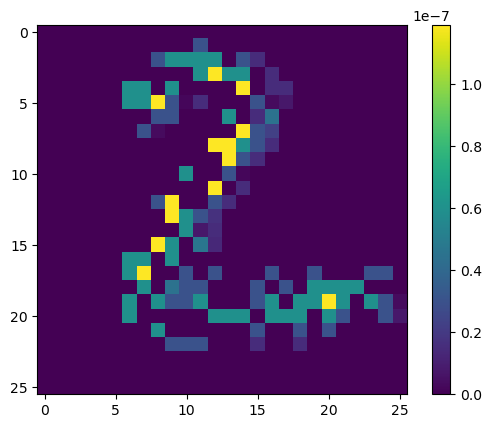

In [20]:
plt.imshow(error[0],vmin = error[0].min(),vmax = error[0].max())
plt.colorbar()
plt.plot()

[]

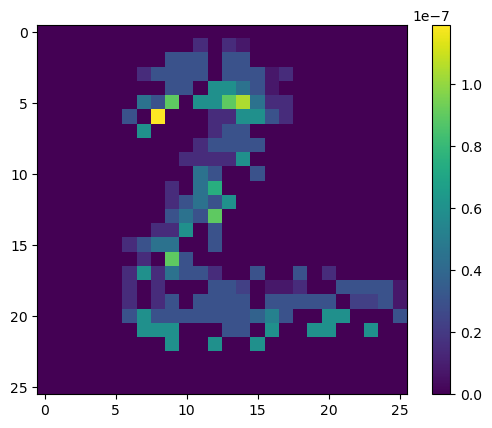

In [21]:
plt.imshow(error[1],vmin = error[1].min(),vmax = error[1].max())
plt.colorbar()
plt.plot()

[]

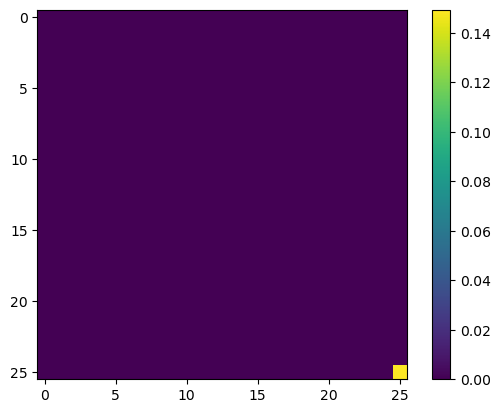

In [22]:
plt.imshow(error[2],vmin = error[2].min(),vmax = error[2].max())
plt.colorbar()
plt.plot()

# Testing batchnorm1

Giving batchNorm1 weights from SME to PyTorch model

In [13]:
%cd ../../../../Configs
batchNorm1_weights = open('batchNorm1.json')
batchNorm1_weights = json.load(batchNorm1_weights)
model_original.batchNorm1.weight = nn.Parameter(torch.tensor(batchNorm1_weights["gammas"]))
model_original.batchNorm1.bias = nn.Parameter(torch.tensor(batchNorm1_weights["betas"]))
model_original.batchNorm1.running_mean = nn.Parameter(torch.tensor(batchNorm1_weights["means"]),requires_grad=False)
model_original.batchNorm1.running_var = nn.Parameter(torch.tensor(batchNorm1_weights["vars"]),requires_grad=False)

c:\Users\sture\Documents\Studie\Bachelor\bachelorprojekt\sme\CNNSmall\Configs


Getting predictions from PyTorch model

In [14]:
model_original.batchNorm1.training = False

In [15]:
pred_pytorch_batchNorm1 = model_original.batchNorm1(nn.Parameter(pred_sme_conv1.reshape((1,3,26,26)),requires_grad=False))